<a href="https://www.kaggle.com/code/stutiiikatariaaa/multilayerperceptron?scriptVersionId=270017011" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import keras_tuner as kt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

2025-06-08 18:52:33.711392: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749408753.914438      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749408753.975409      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load and preprocess data
df = pd.read_csv('/kaggle/input/solargeneration/dataset.csv')
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1749408767.717407      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1749408767.718140      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
I0000 00:00:1749408770.833923      99 service.cc:148] XLA service 0x7c2ae400a6a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749408770.834275      99 service.cc:156]   St

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Fold 1 R² Score: 0.8501


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Fold 2 R² Score: 0.8648


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Fold 3 R² Score: 0.8510


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Fold 4 R² Score: 0.8570


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Fold 5 R² Score: 0.8408


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

📊 Cross-Validated R² Scores for MLP:
Fold 1: 0.8501
Fold 2: 0.8648
Fold 3: 0.8510
Fold 4: 0.8570
Fold 5: 0.8408

✅ Mean R²: 0.8527 ± 0.0080


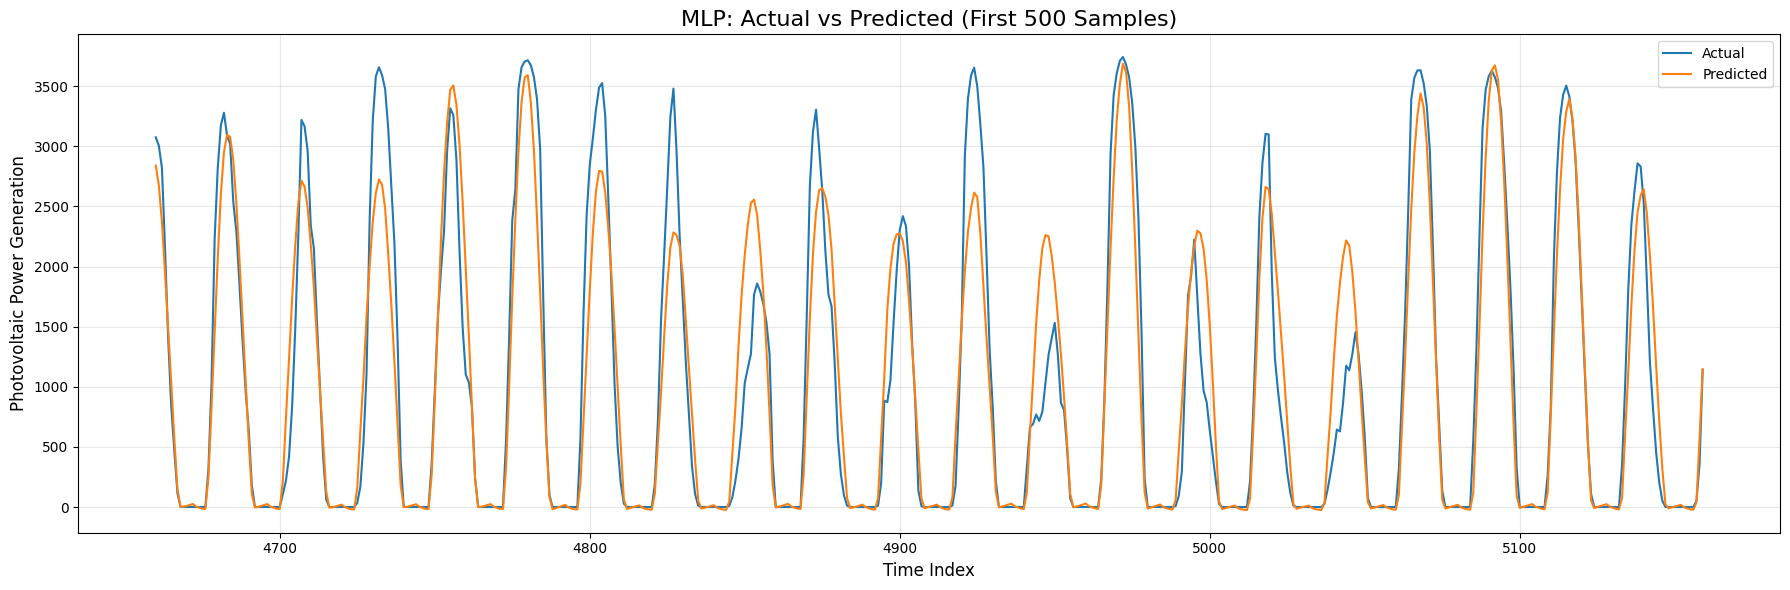

In [3]:
# Clean column names
df.columns = df.columns.str.strip()

# Feature engineering
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek

# Select features and target
features = ['temperature', 'Ground_radiation_intensity', 'hour']
X = df[features]
y = df['Photovoltaic_power_generation']

# Scale all data (for KFold)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Build MLP model
def build_mlp(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = []
fold = 1

for train_index, val_index in kf.split(X_scaled):
    X_train_cv, X_val_cv = X_scaled[train_index], X_scaled[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]
    
    model = build_mlp(input_dim=X_scaled.shape[1])
    model.fit(X_train_cv, y_train_cv, epochs=50, batch_size=32, verbose=0)
    
    y_pred_cv = model.predict(X_val_cv).flatten()
    r2 = r2_score(y_val_cv, y_pred_cv)
    r2_scores.append(r2)
    
    print(f"Fold {fold} R² Score: {r2:.4f}")
    fold += 1

# Final Model Training on Full Training Set
train_size = int(len(X) * 0.8)
X_train_scaled = X_scaled[:train_size]
X_test_scaled = X_scaled[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

final_model = build_mlp(input_dim=X_train_scaled.shape[1])
final_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
y_pred = final_model.predict(X_test_scaled).flatten()

# Evaluation
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)
print(f"\n📊 Cross-Validated R² Scores for MLP:")
for i, score in enumerate(r2_scores, 1):
    print(f"Fold {i}: {score:.4f}")
print(f"\n✅ Mean R²: {mean_r2:.4f} ± {std_r2:.4f}")

# Plot
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred}, index=y_test.index)
plt.figure(figsize=(18, 6))
results.head(500).plot(ax=plt.gca())
plt.title("MLP: Actual vs Predicted (First 500 Samples)", fontsize=16)
plt.xlabel("Time Index", fontsize=12)
plt.ylabel("Photovoltaic Power Generation", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [4]:
!pip install scikeras --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 82.8 MB/s eta 0:00:00:00:01:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.0 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


In [ ]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

# Function to build model with tunable parameters
def create_model(n1=128, n2=64, n3=32, learning_rate=0.001):
    model = Sequential([
        Dense(n1, activation='relu', input_shape=(X_scaled.shape[1],)),
        Dense(n2, activation='relu'),
        Dense(n3, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# Wrap with KerasRegressor from scikeras
regressor = KerasRegressor(model=create_model, verbose=0)

# Define hyperparameter search space
param_grid = {
    'model__n1': [64, 128],
    'model__n2': [32, 64],
    'model__n3': [16, 32],
    'model__learning_rate': [0.001, 0.01],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

# Run grid search with cross-validation
grid = GridSearchCV(estimator=regressor, param_grid=param_grid, scoring='r2', cv=3, n_jobs=1,verbose=2)
grid_result = grid.fit(X_scaled, y)

# Print best results
print("\n🔍 Grid Search Results:")
print(f"✅ Best Parameters: {grid_result.best_params_}")
print(f"📈 Best Cross-Validated R² Score: {grid_result.best_score_:.4f}")

# Evaluate best model on test data
best_model = grid_result.best_estimator_.model_
y_pred_best = best_model.predict(X_test_scaled).flatten()
r2_test_best = r2_score(y_test, y_pred_best)

print(f"\n📊 R² on Test Set Using Best Tuned Model: {r2_test_best:.4f}")


Fitting 3 folds for each of 64 candidates, totalling 192 fits


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.001, model__n1=64, model__n2=32, model__n3=16; total time=  31.6s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.001, model__n1=64, model__n2=32, model__n3=16; total time=  29.4s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.001, model__n1=64, model__n2=32, model__n3=16; total time=  30.0s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.001, model__n1=64, model__n2=32, model__n3=32; total time=  30.6s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.001, model__n1=64, model__n2=32, model__n3=32; total time=  29.5s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.001, model__n1=64, model__n2=32, model__n3=32; total time=  29.4s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.001, model__n1=64, model__n2=64, model__n3=16; total time=  29.8s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.001, model__n1=64, model__n2=64, model__n3=16; total time=  29.3s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.001, model__n1=64, model__n2=64, model__n3=16; total time=  29.4s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.001, model__n1=64, model__n2=64, model__n3=32; total time=  29.5s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.001, model__n1=64, model__n2=64, model__n3=32; total time=  29.2s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.001, model__n1=64, model__n2=64, model__n3=32; total time=  29.2s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.001, model__n1=128, model__n2=32, model__n3=16; total time=  29.0s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.001, model__n1=128, model__n2=32, model__n3=16; total time=  28.0s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.001, model__n1=128, model__n2=32, model__n3=16; total time=  29.7s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.001, model__n1=128, model__n2=32, model__n3=32; total time=  29.3s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.001, model__n1=128, model__n2=32, model__n3=32; total time=  28.5s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.001, model__n1=128, model__n2=32, model__n3=32; total time=  28.9s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.001, model__n1=128, model__n2=64, model__n3=16; total time=  30.2s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.001, model__n1=128, model__n2=64, model__n3=16; total time=  29.0s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.001, model__n1=128, model__n2=64, model__n3=16; total time=  29.6s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.001, model__n1=128, model__n2=64, model__n3=32; total time=  30.4s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.001, model__n1=128, model__n2=64, model__n3=32; total time=  29.6s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.001, model__n1=128, model__n2=64, model__n3=32; total time=  30.4s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.01, model__n1=64, model__n2=32, model__n3=16; total time=  29.0s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.01, model__n1=64, model__n2=32, model__n3=16; total time=  29.5s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.01, model__n1=64, model__n2=32, model__n3=16; total time=  29.5s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__learning_rate=0.01, model__n1=64, model__n2=32, model__n3=32; total time=  30.3s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
y_pred_best = best_model.predict(X_test_scaled).flatten()
# Create DataFrame for plotting
tuned_results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_best}, index=y_test.index)

# Plot first 500 samples
plt.figure(figsize=(18, 6))
tuned_results.head(500).plot(ax=plt.gca())
plt.title("Tuned MLP: Actual vs Predicted (First 500 Samples)", fontsize=16)
plt.xlabel("Time Index", fontsize=12)
plt.ylabel("Photovoltaic Power Generation", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
for train_idx, val_idx in kf.split(X_np):
    print(f"\n=== Fold {fold_num} ===")
    
    X_train_fold, X_val_fold = X_np[train_idx], X_np[val_idx]
    y_train_fold, y_val_fold = y_np[train_idx], y_np[val_idx]
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_fold)
    X_val_scaled = scaler.transform(X_val_fold)
    
    input_dim = X_train_scaled.shape[1]

    tuner = kt.RandomSearch(
        hypermodel=lambda hp: build_model(hp, input_dim),
        objective='val_mse',
        max_trials=10,
        executions_per_trial=1,
        directory='my_dir_cv',
        project_name=f'mlp_tuning_fold_{fold_num}',
        overwrite=True
    )
    
    tuner.search(
        X_train_scaled, y_train_fold,
        epochs=30,
        validation_data=(X_val_scaled, y_val_fold),
        batch_size=32,
        verbose=0
    )
    
    best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
    
    print("Best hyperparameters found:")
    print(f"  Number of layers: {best_hp.get('num_layers')}")
    for i in range(best_hp.get('num_layers')):
        print(f"  Units in layer {i}: {best_hp.get(f'units_{i}')}")
    print(f"  Learning rate: {best_hp.get('learning_rate'):.6f}")
    
    best_model = tuner.get_best_models(num_models=1)[0]
    y_val_pred = best_model.predict(X_val_scaled).flatten()
    
    mse = mean_squared_error(y_val_fold, y_val_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val_fold, y_val_pred)
    r2 = r2_score(y_val_fold, y_val_pred)
    
    print(f"Fold {fold_num} Metrics:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")
    
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    
    # Store best predictions
    if r2 > best_r2:
        best_r2 = r2
        best_y_val_actual = y_val_fold
        best_y_val_pred = y_val_pred

    fold_num += 1


In [ ]:
print("\n=== Aggregate Metrics Across All Folds ===")
print(f"Mean MSE: {np.mean(mse_scores):.4f} ± {np.std(mse_scores):.4f}")
print(f"Mean RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
print(f"Mean MAE: {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
print(f"Mean R² Score: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")

In [ ]:
results = pd.DataFrame({
    'Actual': best_y_val_actual[:500],
    'Predicted_MLP': best_y_val_pred[:500]
})

In [ ]:
plt.figure(figsize=(18, 6))  
results.plot(style=['-', '--'], ax=plt.gca()) 
plt.title("Tuned MLP: Actual vs Predicted (First 500 Samples)", fontsize=16)
plt.xlabel("Time Index", fontsize=12)
plt.ylabel("Power Generation (kW)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
results = pd.DataFrame({
    'Actual': best_y_val_actual,
    'Predicted_MLP': best_y_val_pred
}, index=y_test.index)

# Select data for the first 500 hours by slicing the index
first_500_hours = results.loc[results.index[:100]]

plt.figure(figsize=(18, 6))  
first_500_hours.plot(style=['-', '--'], ax=plt.gca()) 
plt.title("Tuned MLP: Actual vs Predicted (First 500 Hours)", fontsize=16)
plt.xlabel("Time Index", fontsize=12)
plt.ylabel("Power Generation (kW)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
